<a href="https://colab.research.google.com/github/RajeshwariMankar/Object-detection/blob/master/objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install PyDrive**

In [0]:
!pip install PyDrive

     |████████████████████████████████| 993kB 3.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


**Import libraries and create client**

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Download file based on its file id**

In [0]:
downloaded = drive.CreateFile({'id': '1W6DFpimMcqDflJMqUw2Z67llxygMP7h4'})
print(downloaded['title'])
downloaded.GetContentFile('darkflow-master.zip')

darkflow-master.zip


In [0]:
# Unzip the file
!unzip darkflow-master.zip

Archive:  darkflow-master.zip
   creating: darkflow-master/
   creating: darkflow-master/ckpt/
  inflating: darkflow-master/ckpt/checkpoint  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-125.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-250.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-375.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-500.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-625.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-750.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-875.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-1000.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-1125.data-00000-of-00001  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-1125.index  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-1125.meta  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-1125.profile  
  inflating: darkflow-master/ckpt/tiny-yolo-voc1-1250.data-00000-of-00001  
  inflating: d

In [0]:
# Move to the folder
cd darkflow-master

/content/darkflow-master


**Install darkflow with pip globally**

In [0]:
!pip install .

Processing /content/darkflow-master
  Stored in directory: /root/.cache/pip/wheels/94/cd/45/fe842f09b1dc09b90a7b34f82e86d34db8978db075b9e3c173
Successfully built darkflow


**Train the yolo model**

In [0]:
!flow --model cfg/tiny-yolo-voc1.cfg --load bin/tiny-yolo-voc.weights --train --annotation train/Annotations --dataset train/Images --epoch 150

W0613 17:35:58.914663 140264209213312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0613 17:35:58.914915 140264209213312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0613 17:35:58.915022 140264209213312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0613 17:35:58.915114 140264209213312 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0613 17:35:58.915210 

**Import libraries to load the model**

In [0]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

W0621 07:39:16.045018 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/build.py:15: The name tf.train.RMSPropOptimizer is deprecated. Please use tf.compat.v1.train.RMSPropOptimizer instead.

W0621 07:39:16.046646 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/build.py:16: The name tf.train.AdadeltaOptimizer is deprecated. Please use tf.compat.v1.train.AdadeltaOptimizer instead.

W0621 07:39:16.047628 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/build.py:17: The name tf.train.AdagradOptimizer is deprecated. Please use tf.compat.v1.train.AdagradOptimizer instead.

W0621 07:39:16.052647 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/build.py:18: The name tf.train.AdagradDAOptimizer is deprecated. Please use tf.compat.v1.train.AdagradDAOptimizer instead.

W0621 07:39:16.055907 139638569105280 deprecation_wrapper.py:119] From /conten

In [0]:
#To show this as svg images
%config InlineBackend.figure_format = 'svg'

**Load the model**

In [0]:
options = {
    'model': '/content/darkflow-master/cfg/tiny-yolo-voc1.cfg',
    'load': 3450,                             # 3450 is the step number. Can be found in the ckpt folder
    'threshold': 0.05,                       # this number can be higher if the performance is better
    'gpu': 1.0                               # Dont use this if you have no gpu
}

tfnet = TFNet(options)

W0621 07:46:54.555423 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/build.py:105: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 07:46:54.567155 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/ops/baseop.py:70: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0621 07:46:54.568251 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/ops/baseop.py:71: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0621 07:46:54.578965 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/ops/baseop.py:84: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0621 07:46:54.652727 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/ops/simple.py

Parsing /content/darkflow-master/cfg/tiny-yolo-voc1.cfg
Loading None ...
Finished in 0.00010991096496582031s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2      

W0621 07:46:56.404785 139638569105280 deprecation_wrapper.py:119] From /content/darkflow-master/darkflow/net/build.py:132: The name tf.GPUOptions is deprecated. Please use tf.compat.v1.GPUOptions instead.



 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 13, 13, 1024)
 Init  |  Yep!  | conv 1x1p0_1    linear           | (?, 13, 13, 40)
-------+--------+----------------------------------+---------------
GPU mode with 1.0 usage


W0621 07:46:59.918082 139638569105280 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Loading from ./ckpt/tiny-yolo-voc1-3450
Finished in 5.818031072616577s



**Predict the image**

In [0]:
# read the color image and covert to RGB

img = cv2.imread('/content/darkflow-master/test_images/ankle_boot2.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

# use YOLO to predict the image
result = tfnet.return_predict(img)
result


[{'bottomright': {'x': 200, 'y': 247},
  'confidence': 0.104880616,
  'label': 'Ankle boots',
  'topleft': {'x': 25, 'y': 38}}]

**Display the predicted output**

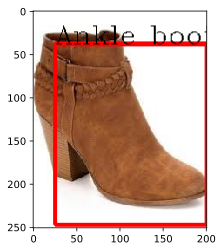

In [0]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (255, 0, 0), 3) # draw a ractangle onto an image
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX   , 1, (0, 0, 0), 1) # add laebl name
plt.imshow(img)
plt.show()



In [0]:
#This command can be used for testing but it didn't work for me
#!flow --imgdir content/darkflow-master/test_images/ankle_boot1.jpg --model cfg/tiny-yolo-voc1.cfg --load 3450